# Foodmart Data Analysis: Executive Summary

# Question One

_Management is trying to better understand what is happening at these food marts. To that end, please create some visualizations to help us better understand the following dimensions of the Foodmart data:_

_- Category of products sold_

_- Brand of products sold_




### Which Product Categories are most profitable, and why?

[Click here for the full analysis.](notebooks/question_one.html)

From a business standpoint, supermarkets exist to make money from the food they sell. So it's useful to know which types of products are driving profit.

I've used the transaction data to calculate the _total gross profit_ of all the products sold under each product category. (The _total_ gross profit is the sum of gross profits for every transaction associated with the product. A transaction's _gross profit_ is its sales revenue minus its costs.)


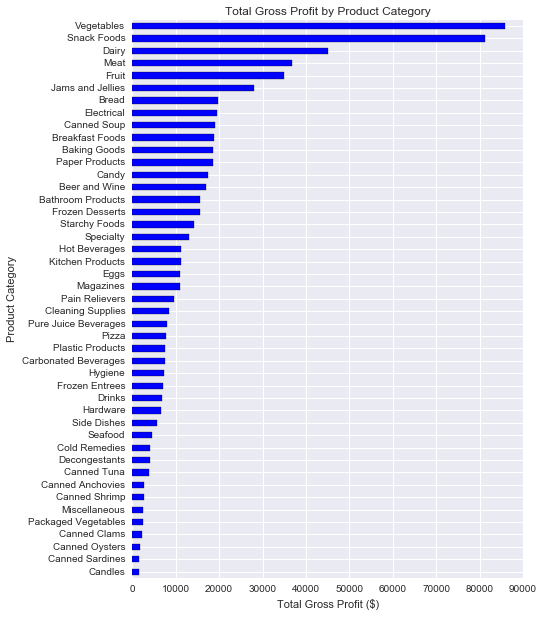

In [44]:
from IPython.display import Image
Image(filename='total_profit_by_product_category.png') 

- The most profitable are Vegetables, Snack Food, Dairy, Meat and Fruit. They brought in over \$30,000 in profit over the course of 1997 (keep in mind, these numbers are small because we're likely working with a small sample of transactions.)

Why are some product categories more profitable than others? Intuitively, the biggest driver by far is simply the the number of products that sold under that category:

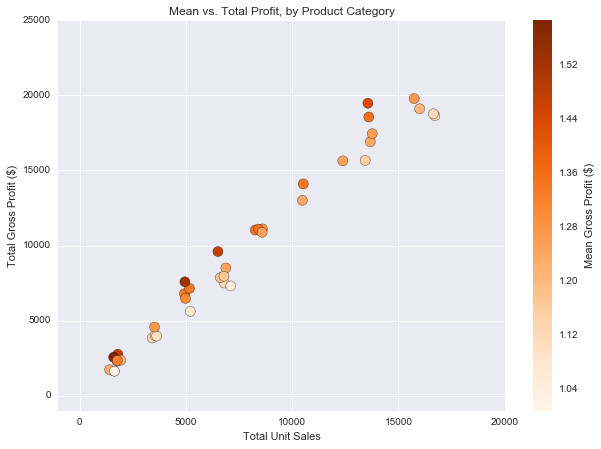

In [46]:
Image(filename='mean_vs_total_profit_by_product_category.png')

Unsurprisingly, total units sales are very highly correlated with total profits for a product category. 

But another variable also plays a role: the mean profit per unit, visualized above using the color of the dots. For a given number of unit sales, product categories with a higher mean profit per unit tended to be more profitable.


To drill down further on the categories, I've also placed each of them into one of four _profit margin buckets_, from low to very high, according to the average profit margin of the products within each category. (For the exact dollar ranges that define each bucket, see the chart below.)

For example, Foodmart keeps an average of \$0.74 for every piece of Seafood it sells, so that category would go into the "low margin" bucket. It makes an average of \$1.58 for every piece of Meat it sells, so Meat goes into the "high margin" bucket.

We can now view the profitability of product categories for each profit margin bucket:

- 24% of product categories have medium margins, while 37% have high margins. Theree are relative few products at either end of the profit margin scale.
- Of the 5 products that made over $3,000 in gross profits, all of them are in the "high margin" category, not the "very high margin" category.
- Across all margin buckets, canned and prepared foods (canned shrimp, packaged vegtables, canned tuna) appear to be less profitable than fresh foods (eggs, dairy, beer).

###  Which Product Brands are most profitable, and why?

[Click here for the full analysis.](notebooks/question_one.html#Which-product-brands-are-the-most-profitable?)

We can do a similar profit analysis for product brands.

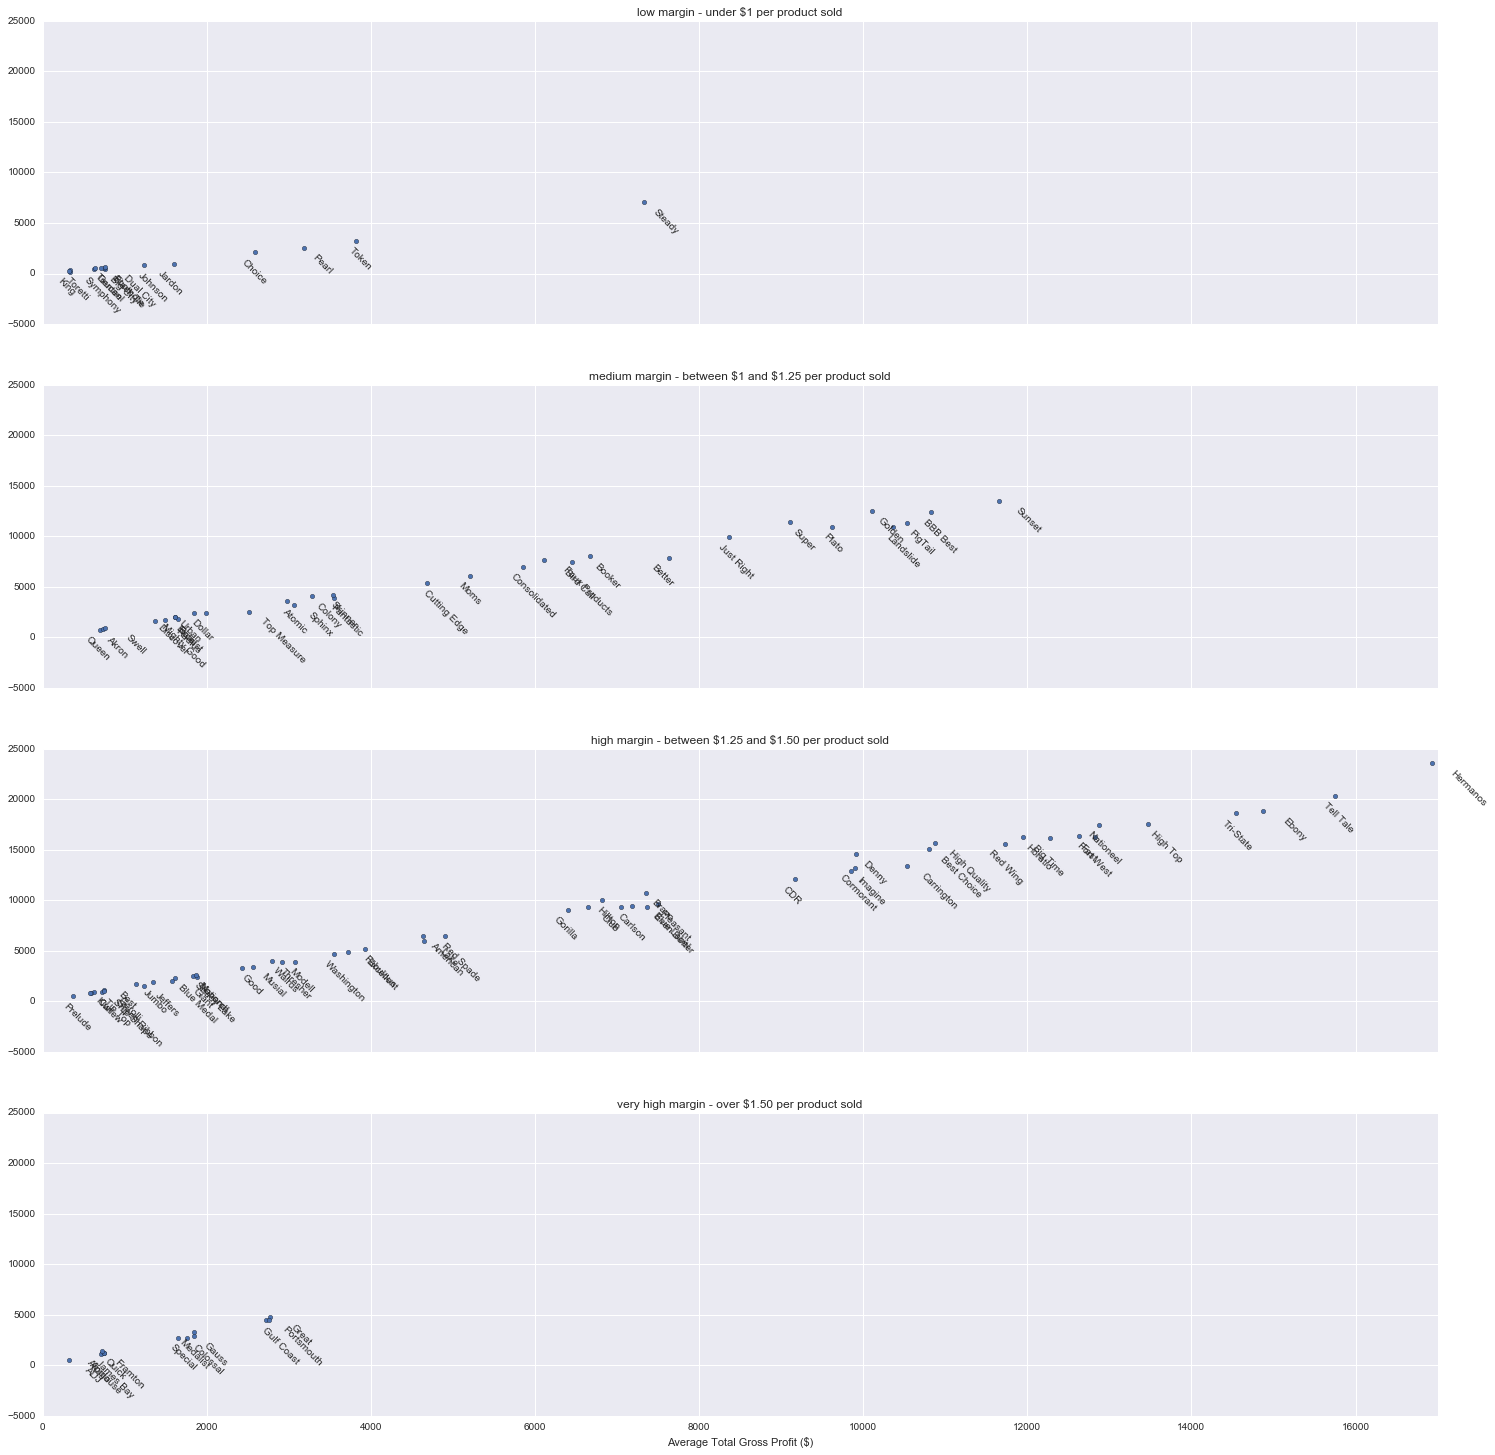

In [51]:
Image(filename='product_brand_sales_vs_profit_by_margin.png') 

The data visualization above depicts total profits for each product brand, faceted by profit margin bucket (just like we did for product categories), with one additional dimension: the number of units sold.

The visualization could be useful for Foodmart management to see which brands to stock more of, and which ones to drop. [Click here for the full-size image](notebooks/product_brand_sales_vs_profit_by_margin.png).

It allows you to simultaneously observe the relationship between units sold and profits, and the fact that _the most profitable brands fall overwhelmingly into the medium and high margin buckets_ - between \$1 and \$1.50 per product sold. Since brand profitability falls dramatically on either side of that boundary, its appears that the profitability "sweet spot" is between \$1.15 and \$1.35.


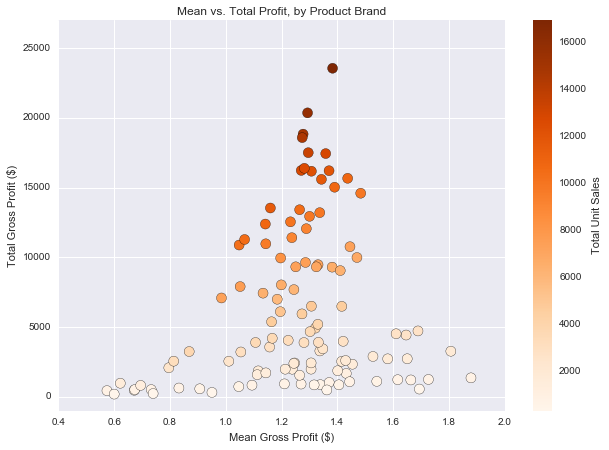

In [47]:
Image(filename='mean_vs_total_profit_by_product_brand.png')

The chart above shows the same information, but the x axis is now mean profit (as a continous variable, not bucketed) and color of the dots represents the total sales. 

We can see clearly that although unit sales ultimately drive profits, brands only tended to have high unit sales if the mean profit margins of their products were between \$1.10 and \$1.50.

# Question Two

_The executive team at Foodmart is starting to brainstorm approaches for growing sales and profitability next year. And by next year, we mean 1998. :) They've asked the analytics team to highlight 2-3 insights from the previous year's data to help inform the strategy for next year._

_Please provide an executive summary of your findings, the implications for Foodmart, and the supporting analysis._



### Insight 1: Some promotion types are much more profitable than others

Foodmart runs hundreds of promotions a year in an effort to boost profits. 
Understanding which promotions actually do so, and focusing on them, seems like a core component of any profit growth strategy.

We'll first explore profitability by the promotion's type, and then by the media channel it was promoted through.

_Findings_

To gauge a Foodmart promotion's profitability, we can measure it's _total gross profit_, just like we did for product categories and brands.

However, Foodmart promotions last between one to four days. To be able to compare the total gross profits of different promotions, then, we define a _total profit per day_ metric. This metric captures a promotion's "profit velocity".

Once we know the daily profit each Foodmart promotion had in 1997, we can look at the _average_ daily profit of campaigns belonging to different **promotion types**:

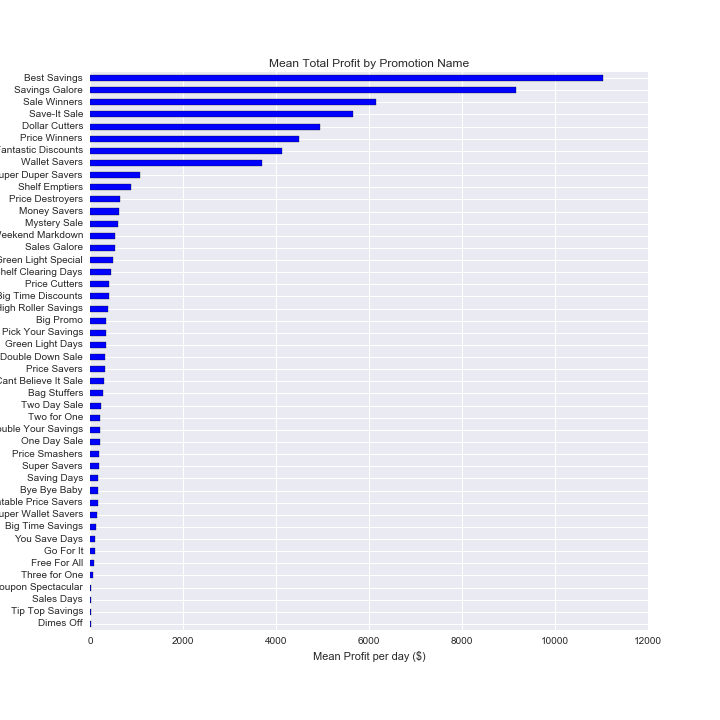

In [37]:
Image(filename='mean_total_profit_by_promo_name.png')

- 20% of promotions brought in 80% of the total _gross profits_ - the profit made on each product sold, without factoring in overhead.
- These promotions all belonged to one of 8 "highly profitable" promotion types (the ones at the top of the chart), whose promotions made an average of \$3,700+ of daily gross profit. 
- All other promotion types had much lower 'profit velocities', around \$1,000 in daily profit.

_Implications_

Although there may be confounding factors for why promotions in "highly profitable" promo categories make so much money, the difference is striking enough that management should experiment with creating promotions within those categories:
        Best Savings, Savings Galore, Save-It Sale, Dollar Cutters, Price Winners, Fantastic Discounts, and Wallet Savers.
        
If profitability stays high, that suggests that promotion type is behind the relatively small number of profitable campaigns. If not, profitability might be driven by other factors, such media channel.

_Analysis_

[Click here for data quality analysis.](notebooks/data_quality_analysis.html)

[Click here for full analysis.](notebooks/question_two.html)

### Insight 2: Some promotion media types are much more profitable than others

_Findings_


Besides the promotion type, it might also be that case that advertising promotions through certain media channels leads to much higher sales than others. For evidence of this hypothesis, let's look at daily profit of promotions, but this time averaged according to their media type.

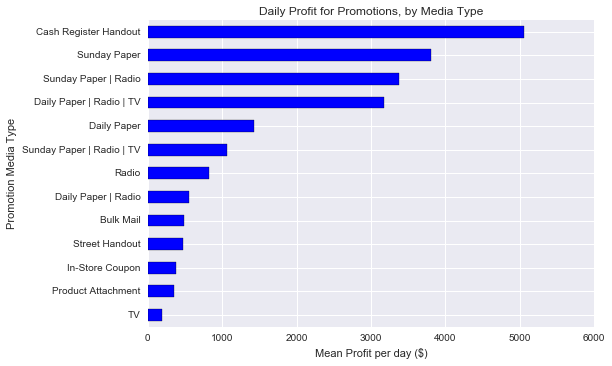

In [41]:
Image(filename='mean_total_profit_by_media_type.png')

- Promotions that were advertised through Cash Register Handouts, the Sunday Paper, the Sunday Paper + Radio, and the Daily Paper + Radio + TV were much more likely to be profitable that those promoted by any other means.
- Radio was more likely to be profitable when combined with either Daily or Sunday newspapers.
- Physical channels such as Bulk Mail, Street Handouts, In-Store Coupons, Product Attachments underperformed every media channel except for TV alone.
- TV performed worst of all.

Promotional campaigns cost money to execute. So it doesn't just matter that a particular media channels is associated with profitable campaigns. You also want that channel to be cost-effective. 

To get an idea of the cost-effectiveness of each media type, let's compare each channel's average daily profits with its average daily cost.

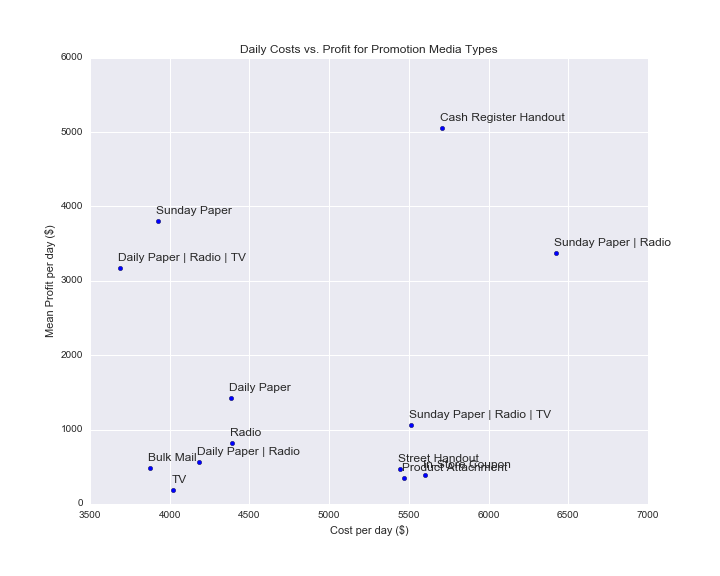

In [15]:
Image(filename='costs_vs_profit_media_types.png')

- _NOTE: Our mean profit per day figures are derived from what is probably a sample of transactions [more info here](foo), and thus likely underestimate the true mean profit per day. We can't compare them directly with costs to calculate a media channel's ROI. But we can gauge, at least directionally, which channels were cost effective compared to all the others._

- Although Sunday Paper + Radio has comparable daily profit velocity to Sunday Paper and Daily Paper + Radio + TV, it is around 70% more expensive per day.
- Cash Register Handout is 32% more profitable than Sunday Paper, but it is 45% more expensive. This suggests it is likely less cost-effective than Sunday Paper and Daily Paper + Radio.
* Street Handouts, In-Store Coupons, and Product attachments are not only not very profitable, but they are less cost effective than other low-profitability channels like Daily Paper and TV.

_Implications_

Management should focus promotion advertising on Sunday Paper, Daily Paper + Radio + TV, and Cash Register, and away from TV, Bulk Mail, Street Handsouts, In-Store Coupons, and product attachments.

Once again, there may be confounding factors at play here. Management should focus on profitable promotion types in 1998, but alternate the media channels they promote them through. That will help tease apart whether promotion type or media channels are driving profitability - or, really, if either of them are.

_Analysis_

[Click here for full analysis](notebooks/question_two.html#Profits-by-Media-Channel---media_type)

# Question Three

_Work sample relevant to the position._

### Cubisima.com - A Quantitative Peek At Cuba's (Re-)Emerging Real Estate Market

In 2011, Cuba took the biggest step towards capitalism since it became a command economy in 1959—it legalized the buying and selling of real estate. 

Most of the world's socialist economies liberalized after the fall of the Berlin Wall. But because Raul Castro initiated reforms in 2011, instead of 1991, Cuba's real estate market was (re)born digital.

Online marketplaces cropped up within weeks, creating preous data exhaust - and an unprecendeted oppotunity to observe the re-emergence of a real estate market in a country that hasn't had one in over half a century.

I wrote a scraper to download 50,000 listings posted on Cubisima.com - Cuba's answer to Craiglist - between summer 2011, right before the reform, and summer 2014. Then I wrote a script to extract a listings details from the HTML of these pages.

The resulting property listings dataset allowed me to take the first quantiative peek at Cuba's new real estate market. What sort of market emerges where there isn't any? Is it growing? What type of property is being sold? Hold much is it going for? And what are the key drivers of price?

- [Click here for the scraper](https://github.com/jpvelez/cubisima/blob/master/Makefile) 

- [Click here for the analysis](https://github.com/jpvelez/cubisima/blob/master/notebooks/cubisima_analysis.ipynb)